In [10]:
import nltk
nltk.download('all') # vader_lexicon

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

[nltk_data]    |   Unzipping corpora/subjectivity.zip.
[nltk_data]    | Downloading package swadesh to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/swadesh.zip.
[nltk_data]    | Downloading package switchboard to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/switchboard.zip.
[nltk_data]    | Downloading package timit to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/timit.zip.
[nltk_data]    | Downloading package toolbox to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/toolbox.zip.
[nltk_data]    | Downloading package treebank to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/treebank.zip.
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/twitter_samples.zip.
[nltk_data]    | Downloading package udhr to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/udhr.zip.
[nltk_data]    | Downloading package udhr2 to /root/nltk_data...
[nltk_data]    |   Unzip

True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import operator
def get_sentiment_for_word(word):
    """
    For a given work, the result is "neg", "neu" or "pos"
    """
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(word)
    return max(score.items(), key=operator.itemgetter(1))[0]
def analyze_sentence(sentence):
    """
    Display negative and positive words in a given sentence.
    """
    words = sentence.split(' ')
    words_with_sentiment = [(w, get_sentiment_for_word(w)) for w in words]
    print(sentence)
    print("negative words:", [w[0] for w in words_with_sentiment if w[1] == 'neg'])
    print("positive words:", [w[0] for w in words_with_sentiment if w[1] == 'pos'])
    print()

In [13]:
sentences = [
    "I love you.",
    "You must admit that Bryant Gumbel is one of the dumbest racists around - an arrogant dope with no talent. Failed at CBS etc-why still on TV?",
"I feel sorry for Rosie 's new partner in love whose parents are devastated at the thought of their daughter being with @Rosie--a true loser.",
]
for sentence in sentences:
    analyze_sentence(sentence)

I love you.
negative words: ['I']
positive words: ['love']

You must admit that Bryant Gumbel is one of the dumbest racists around - an arrogant dope with no talent. Failed at CBS etc-why still on TV?
negative words: ['dumbest', 'racists', '-', 'arrogant', 'no', 'Failed']
positive words: ['admit', 'talent.']

I feel sorry for Rosie 's new partner in love whose parents are devastated at the thought of their daughter being with @Rosie--a true loser.
negative words: ['I', 'sorry', 'devastated', 'loser.']
positive words: ['love', 'true']

I loved beating these two terrible human beings. I would never recommend that anyone use her lawyer, he is a total loser!
negative words: ['I', 'beating', 'terrible', 'I', 'a', 'loser!']
positive words: ['loved', 'recommend']

Came here on holiday with my wife for a much needed rest and was looking forward to a relaxing Spa break however the noise levels detract from the whole experience. There are weddings, corporate functions and music going on permanen

**Exercice**

Below is an example of negative comment for an hotel: https://www.tripadvisor.com/ShowUserReviews-g298343-d305531-r539684070-Sugar_Beach_Mauritius-Flic_En_Flac.html#CHECK_RATES_CONT


> Came here on holiday with my wife for a much needed rest and was looking forward to a relaxing Spa break however the noise levels detract from the whole experience.

> There are weddings, corporate functions and music going on permanently. Currently sitting outside our bedroom here looking at the sunset through a group of corporate guests who have a function set up on the lawn in front of us. Totally miss sold through Virgin. This is not paradise at all rather a disgrace."


* What is the sentiment analysis associated to this comment with the vader tool?
* What is the result using this api? http://text2data.org/Demo/Demo

**Project**

* Given customers reviews for a specific hotel: https://www.tripadvisor.com/ShowUserReviews-g298343-d305531-r539684070-Sugar_Beach_Mauritius-Flic_En_Flac.html#CHECK_RATES_CONT
* Create a word cloud to summarize the word that are commons to negative review. An example of word cloud generation is given below.
* Clean the data as much as needed (by removing useless words, maybe even stemming them...)

(-0.5, 599.5, 599.5, -0.5)

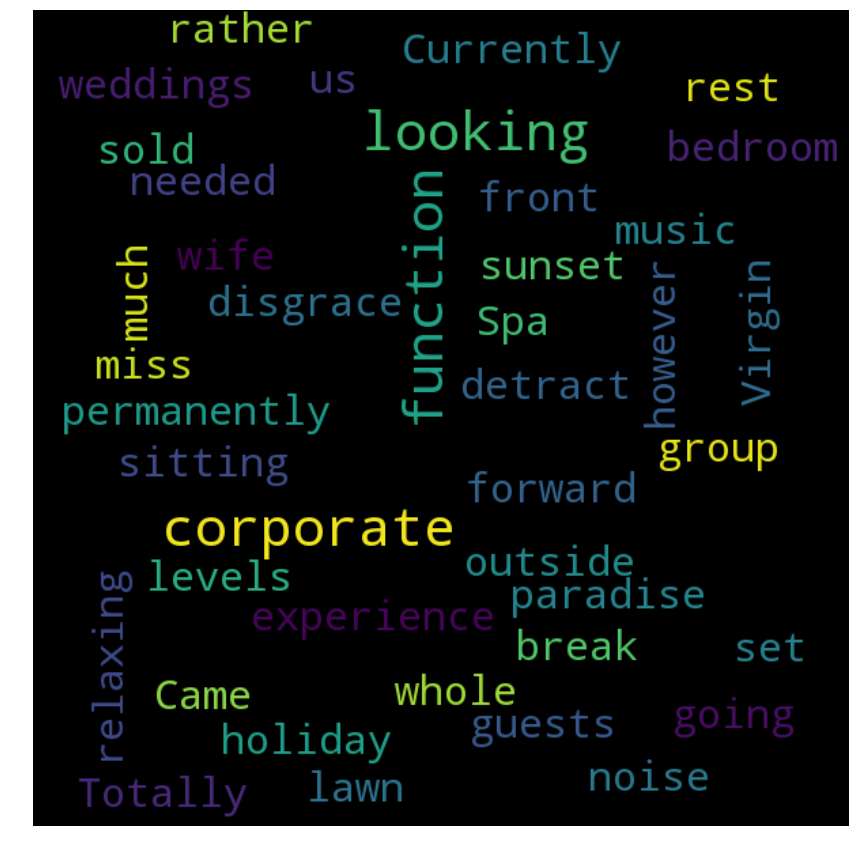

In [42]:
# Below is an example using wordcloud
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the whole text.
text = "Came here on holiday with my wife for a much needed rest and was looking forward to a relaxing Spa break however the noise levels detract from the whole experience. There are weddings, corporate functions and music going on permanently. Currently sitting outside our bedroom here looking at the sunset through a group of corporate guests who have a function set up on the lawn in front of us. Totally miss sold through Virgin. This is not paradise at all rather a disgrace."
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=600, max_font_size=40).generate(text)
fig2 = plt.figure(figsize = (15,15)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(wordcloud, interpolation="bilinear")
ax3.axis("off")